# Measure 4: Social Network Analysis (Final Presentation Version)

## 1. Introduction
**Objective:** Visualize the social structure of *Anna Karenina*.

## 2. Methodology
* **Visual:** A Network Graph.
    * A **small legend** in the bottom-right corner explains the visual cues (Size/Color).
* **Data:** A complete **data table** is displayed separately below the graph with exact connection counts.

In [1]:
%pip install networkx pandas matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import itertools
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from IPython.display import display

# --- CONFIGURATION ---
nltk.download('punkt')
nltk.download('punkt_tab')

DATA_DIR = '../data'
RESULTS_DIR = '../results'

if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

CONFIG = {
    "filename": "The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy.txt",
    "characters": ["Anna", "Vronsky", "Levin", "Kitty", "Karenin", "Stiva", "Dolly", "Betsy"]
}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 3. Processing Functions

In [3]:
def load_text(filename):
    filepath = os.path.join(DATA_DIR, filename)
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            return f.read()
    except FileNotFoundError:
        print(f"ERROR: File not found at {filepath}")
        return ""

def build_graph(text, characters):
    sentences = sent_tokenize(text)
    G = nx.Graph()
    G.add_nodes_from(characters)
    char_map = {c.lower(): c for c in characters}
    
    print(f"Scanning {len(sentences)} sentences...")
    
    for sent in sentences:
        tokens = set(word_tokenize(sent.lower()))
        found = [char_map[c] for c in char_map if c in tokens]
        if len(found) > 1:
            for pair in itertools.combinations(found, 2):
                u, v = pair
                if G.has_edge(u, v):
                    G[u][v]['weight'] += 1
                else:
                    G.add_edge(u, v, weight=1)
    return G

## 4. Visualization (Clean Graph + Small Bottom-Right Legend)
This generates the graph with a tiny explanatory legend in the corner, and prints the full data table separately below.

In [4]:
def analyze_and_draw(G):
    # --- SETUP PLOT ---
    plt.figure(figsize=(14, 10), facecolor='white')
    ax = plt.gca()
    
    # --- LAYOUT & METRICS ---
    # seed=42 ensures the graph looks the same every time you run it
    pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42) 
    centrality = nx.degree_centrality(G)
    
    # Scale node size: big enough to see, but not covering the whole screen
    node_sizes = [v * 8000 + 500 for v in centrality.values()]
    
    # Calculate edge weights for line thickness
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(weights) if weights else 1
    
    # --- DRAW EDGES ---
    for (u, v, d) in G.edges(data=True):
        width = (d['weight'] / max_weight) * 4 + 0.5
        # 'arrows=True' + 'arrowstyle' fixes the warning and makes curved lines
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=width, alpha=0.3, 
                               edge_color="#555555", connectionstyle="arc3,rad=0.1", 
                               arrows=True, arrowstyle="-", ax=ax)

    # --- DRAW NODES ---
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=list(centrality.values()), 
                           cmap=plt.cm.plasma, alpha=0.9, edgecolors='white', linewidths=2, ax=ax)
    
    # --- DRAW LABELS ---
    labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
    # Add a white "halo" outline to text so it's readable over lines
    import matplotlib.patheffects as path_effects
    for _, label in labels.items():
        label.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    # --- ADD NUMBERED MINI-TABLE (BOTTOM RIGHT) ---
    degrees = dict(G.degree())
    sorted_stats = sorted(degrees.items(), key=lambda item: item[1], reverse=True)
    
    # Build the text with numbering (1. Anna, 2. Vronsky...)
    legend_text = ""
    for i, (char, count) in enumerate(sorted_stats, 1):
        legend_text += f"{i}. {char:<10} : {count}\n"
    legend_text = legend_text.strip() 

    # Place text box
    props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
    plt.text(0.96, 0.02, legend_text, transform=ax.transAxes, fontsize=11,
             verticalalignment='bottom', horizontalalignment='right', bbox=props, fontfamily='monospace')

    # --- ADD SOURCE CREDIT (BOTTOM LEFT) ---
    # This is the "Important Thing" to add for professionalism
    plt.text(0.02, 0.02, "Data Source: Project Gutenberg", transform=ax.transAxes, 
             fontsize=10, color='gray', style='italic')

    # --- TITLES & SAVING ---
    plt.title("Character Interaction Network: Anna Karenina", fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    
    save_path = f"{RESULTS_DIR}/anna_karenina_network_final_v4.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Graph saved to: {save_path}")

    # --- DISPLAY FULL TABLE BELOW ---
    print("\n" + "="*40)
    print("FULL CONNECTION DATA TABLE")
    print("="*40)
    
    df = pd.DataFrame(list(degrees.items()), columns=['Character', 'Connections (Degree)'])
    df = df.sort_values(by='Connections (Degree)', ascending=False).reset_index(drop=True)
    # Add the ranking column to the dataframe too
    df.index += 1 
    
    display(df)
    
    csv_path = f"{RESULTS_DIR}/anna_karenina_network_table_v4.csv"
    df.to_csv(csv_path, index=False)
    print(f"\nTable saved to: {csv_path}")

## 5. Main Execution

Loading text data...
Scanning 16927 sentences...
Generating network visualization...


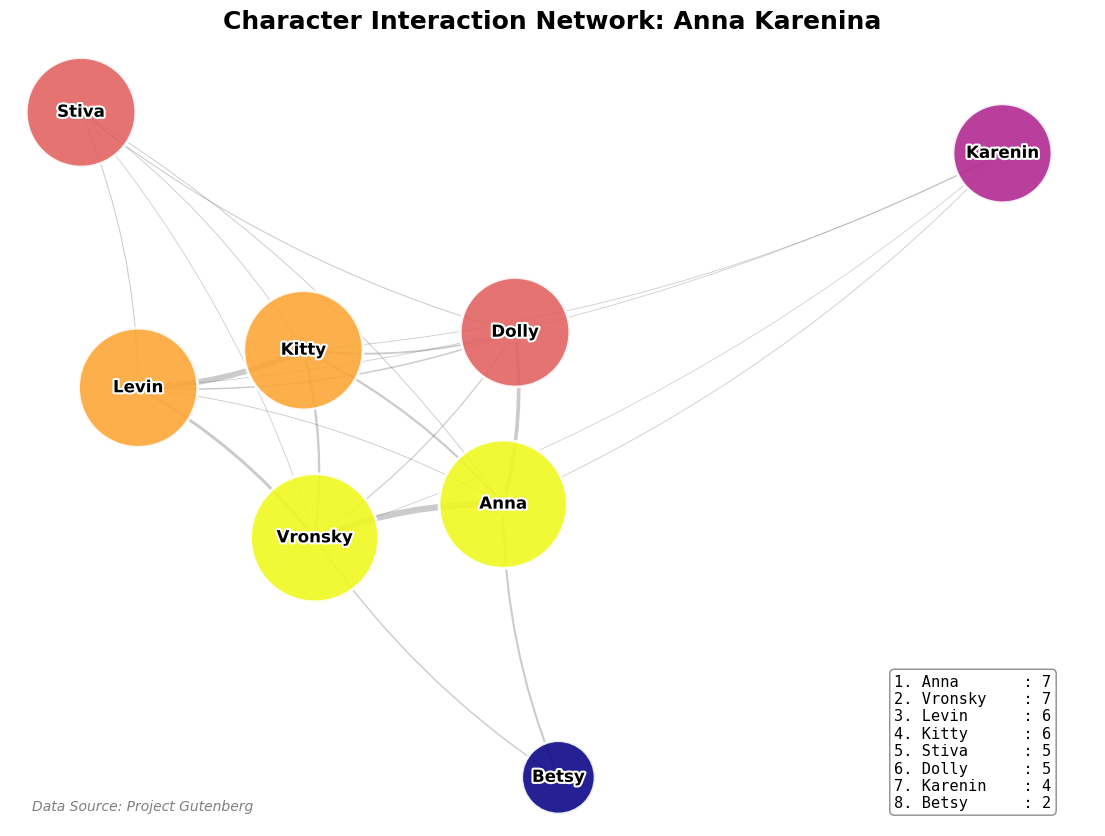

Graph saved to: ../results/anna_karenina_network_final_v4.png

FULL CONNECTION DATA TABLE


,Character,Connections (Degree)
1,Anna,7
2,Vronsky,7
3,Levin,6
4,Kitty,6
5,Stiva,5
6,Dolly,5
7,Karenin,4
8,Betsy,2



Table saved to: ../results/anna_karenina_network_table_v4.csv


In [5]:
def run_analysis():
    print("Loading text data...")
    text = load_text(CONFIG['filename'])
    
    if text:
        G = build_graph(text, CONFIG['characters'])
        if G.number_of_edges() > 0:
            print("Generating network visualization...")
            analyze_and_draw(G)
        else:
            print("No interactions found among the specified characters.")
    else:
        print("File not found. Please check DATA_DIR path.")

run_analysis()